# Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import random

# Loading

In [3]:
data = pd.read_csv("ecom_data.csv", encoding="latin1")
df = data.copy()

# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.tail(10)     

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,12/9/2011 12:50,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,12/9/2011 12:50,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,12/9/2011 12:50,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,12/9/2011 12:50,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12/9/2011 12:50,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [6]:
df.isna().sum()     # checking null containing columns

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
descriptMissing = df.loc[df['Description'].isnull()]
descriptMissing

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


There are 1454 missing values in DESCRIPTION column, let's check those products price

In [8]:
descriptMissing['UnitPrice'].value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

We can see all 1454 missing discription(product) -contains- '0.00' dollar as UnitPrice. So these entries might be garbage value. We need to clean these.


So removing These Rows (1454 rows)

In [9]:
df.dropna(subset=['Description'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      540455 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.1+ MB


In [11]:
# Some knowledge about the DataSet
print(f"This dataset has total {df['CustomerID'].nunique()} customers")
print(f"This dataset has total {df['Description'].nunique()} unique products")
print(f"This dataset has total {df['InvoiceNo'].nunique()} unique transaction")

This dataset has total 4372 customers
This dataset has total 4223 unique products
This dataset has total 24446 unique transaction


Which country has most buyings-?

In [12]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

<AxesSubplot: xlabel='Country', ylabel='count'>

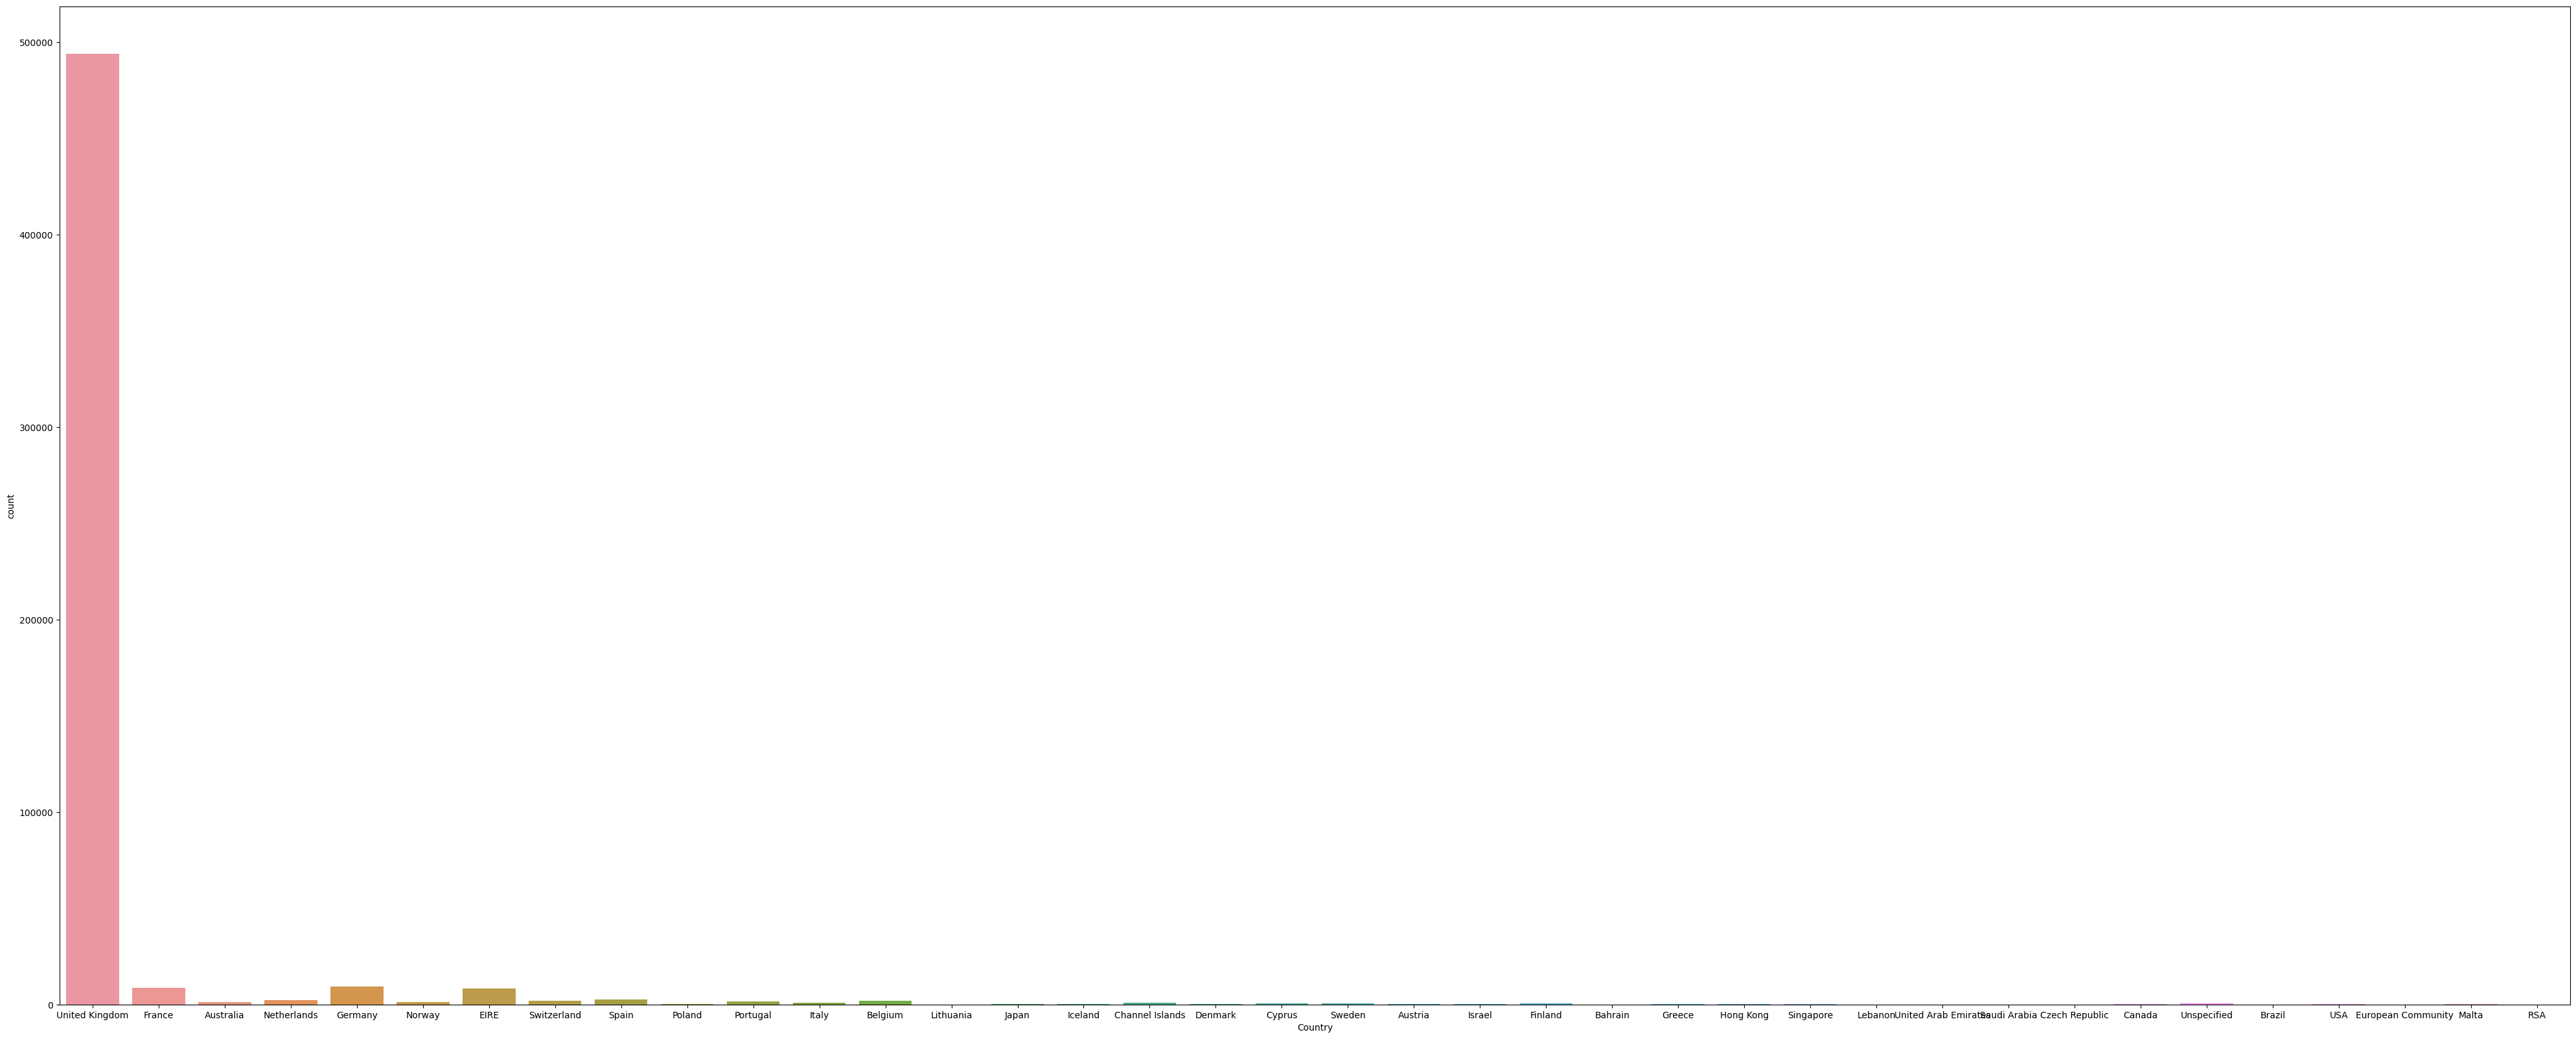

In [13]:
plt.figure(figsize=(50,20))
sns.countplot(data=df, x='Country')

It's UK .

There were huge missing values in customerID column. Need to handle These null values

In [14]:
df[df['CustomerID'].isnull()]  # checking how null containing ROWS are structured. [Analysing]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


We have noticed that, Some Null conatining CustomerID has similar InvoiceNo.

In [15]:
## took a InvoiceNo. from "above output" and checking if any row contains any customerID

df[(df['InvoiceNo'] == '536544') & (df['CustomerID'] is np.number)]

# df[(df['InvoiceNo'] == '536544') & (df['CustomerID'] is not np.number)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


So, we will fill the null values of `CustomerID that has same InvoiceNo.` with 5 digits unique random numbers

In [16]:
df['CustomerID'].isnull().sum()     # total null values

133626

In [17]:
# lets check min max of customerID (Range/Spread)

df['CustomerID'].describe()

count    406829.000000
mean      15287.690570
std        1713.600303
min       12346.000000
25%       13953.000000
50%       15152.000000
75%       16791.000000
max       18287.000000
Name: CustomerID, dtype: float64

The following function is to get a 5 digit value that doesn't already exist in df['CustomerID']

In [18]:
def getUniqueRandom()-> int:
    x = 0
    rn = lambda : np.random.randint(12300,99999)

    while(True):
        x = rn()
        if df[df['CustomerID'] == x].shape[0] == 0:
        # Above line means the random number doesnt exist in df['CustomerID']
            return x    


One customer may have more than one invoice number,

but For the sake of simplicity we have assumed that, "Each customer has only one unique invoice number" 
(To fill null values)

The following function will properly fill null values of CustomerID (that has same InvoiceNo.)

In [19]:
def fillNull():
    # getting null-customerID containing row's InvoiceNo.
    temp = df[df['CustomerID'].isnull()]
    unqInvoice = temp['InvoiceNo'].unique() 

    for invoice in unqInvoice :
        filter1 = df['InvoiceNo'] == str(invoice)
        df['CustomerID'].mask(filter1, other = getUniqueRandom(), inplace=True)

    return 'Done Filling'
    

In [20]:
fillNull()

'Done Filling'

In [21]:
# # this function should apply on df['InvoiceNo']

# def fillNull_2(x):
#     # getting null customerID containing row's InvoiceNo.
#     temp = df[df['CustomerID'].isnull()]
#     Null_UnqInvoice = temp['InvoiceNo'].unique() 
#     if x not in Null_UnqInvoice:
#         return x
#     else:
#         filter1 = df['InvoiceNo'] == str(x)
#         df['CustomerID'].mask(filter1, other = getUniqueRandom(), inplace=True)
#         return x
    



# df['InvoiceNo'] = df['InvoiceNo'].apply(fillNull_2)

In [22]:
df['CustomerID'].isnull().sum()

0

In [23]:
df['CustomerID'] = df['CustomerID'].apply(int)          # converting CustomerID from float to integer

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   CustomerID   540455 non-null  int64  
 7   Country      540455 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 37.1+ MB


Creating a column that shows, if the order was canceled or not

In [25]:
df['Canceled'] = [True if 'C' in x else False for x in df['InvoiceNo']]

In [26]:
canceled_orders = df[df['Canceled'] == True]
canceled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom,True


There are some negative integer CustomerID code, we will absolute them. We want all positive integer

In [27]:
df['CustomerID'] = df['CustomerID'].apply(abs)

In [28]:
df[(df['CustomerID'] < 0) & (df['Canceled'] == True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled


In [29]:
# df.columns.get_loc('Quantity')        # this commands find the given column number

In [30]:
df['Description'].nunique(), df['StockCode'].nunique()

(4223, 3958)

In [31]:
import string
import random

We will now give every products a code number

In [32]:
uniqueProducts = df['Description'].unique()
prod_and_code = {}
for x in uniqueProducts:
    # getting unique string code for products
    temp = ''.join(random.choices(string.ascii_uppercase + string.digits, k=8))
    # putting product name and its code in the dictionary
    prod_and_code[x] = temp     # updating prod_and_code dict
print("Done")

Done


The following function will enter product code for their corresponding products.

In [33]:
def prodCode_generator(x):
    if x in list(prod_and_code.keys()):
        return prod_and_code[x]     # all products name are in prod_and_code.keys() and product codes are in values()


df['ProdCode'] = df['Description'].apply(prodCode_generator)

In [34]:
# df.to_csv('Product_dataset.csv', index=False)

`Our Target` : Now we have to arrange a new DATASET where Customers will be the Row, and ProductCodes will be the columns.

(And we will create data for the DATASET in further)

In [35]:
grp = df.groupby(by=['CustomerID', 'ProdCode'])
# Now each customerID has their purchased product's group.
grp.first()

InvoiceNo     StockCode  \
CustomerID ProdCode                           
12345      4CWWGSYP    560573             M   
12346      ORPAGFI3    541431         23166   
12347      044PMCCF    581180         23271   
           067MHVJ7    549222         22371   
           0A7X10OH    537626         22492   
...                       ...           ...   
99936      ER768KKM   C544575  BANK CHARGES   
99983      DYGFANKD    544595         22328   
           I57COGLP    544595        47570B   
           INOP903H    544595         22315   
99989      S5ZULBWZ    569551         22082   

                                             Description  Quantity  \
CustomerID ProdCode                                                  
12345      4CWWGSYP                               Manual         1   
12346      ORPAGFI3       MEDIUM CERAMIC TOP STORAGE JAR     74215   
12347      044PMCCF  CHRISTMAS TABLE SILVER CANDLE SPIKE        16   
           067MHVJ7         AIRLINE BAG VINTAGE TOKYO 78         4   
           0A7X10OH              MINI PAINT SET VINTAGE         36   
...                                                  ...       ...   
99936      ER768KKM                         Bank Charges        -1   
99983      DYGFANKD   ROUND SNACK BOXES SET OF 4 FRUITS          1   
           I57COGLP                 TEA TIME TABLE CLOTH         1   
           INOP903H         200 RED + WHITE BENDY STRAWS         1   
99989      S5ZULBWZ          RIBBON REEL STRIPES DESIGN          1   

                         InvoiceDate  UnitPrice         Country  Canceled  
CustomerID ProdCode                                                        
12345      4CWWGSYP  7/19/2011 14:47     112.35  United Kingdom     False  
12346      ORPAGFI3  1/18/2011 10:01       1.04  United Kingdom     False  
12347      044PMCCF  12/7/2011 15:52       0.83         Iceland     False  
           067MHVJ7   4/7/2011 10:43       4.25         Iceland     False  
           0A7X10OH  12/7/2010 14:57       0.65         Iceland     False  
...                              ...        ...             ...       ...  
99936      ER768KKM  2/21/2011 13:58     134.76  United Kingdom      True  
99983      DYGFANKD  2/21/2011 17:28       2.95  United Kingdom     False  
           I57COGLP  2/21/2011 17:28      10.65  United Kingdom     False  
           INOP903H  2/21/2011 17:28       1.25  United Kingdom     False  
99989      S5ZULBWZ  10/4/2011 17:40       1.65  United Kingdom     False  

[402166 rows x 8 columns]

In [36]:
grp.groups

{(12345, '4CWWGSYP'): [270558], (12346, 'ORPAGFI3'): [61619, 61624], (12347, '044PMCCF'): [535012], (12347, '067MHVJ7'): [148287, 220580, 286626, 428962], (12347, '0A7X10OH'): [14941, 148303, 428983], (12347, '0BAIAT3Z'): [428984], (12347, '0VV22DBA'): [220582], (12347, '18LLR81C'): [148289], (12347, '1F4VDPD5'): [428968], (12347, '1TDNMN2B'): [14950, 72255, 220588, 286630, 428993], (12347, '2DBCX26A'): [220578], (12347, '2O6JVIN8'): [148298, 286636], (12347, '2R8ORNXA'): [148306], (12347, '3HWO9X1J'): [72247], (12347, '4B5LS79T'): [148304], (12347, '4HKETROC'): [220572, 428974, 535009], (12347, '4MCNJPKN'): [72246, 535007], (12347, '4NUD9O6Z'): [428980], (12347, '4YE3PFYE'): [286622], (12347, '5CTF4BYP'): [14948, 72253, 220589, 428990], (12347, '5V1VG0K6'): [148293, 428976], (12347, '6E2BCKXH'): [535005], (12347, '6H47383T'): [14960], (12347, '6SMXBNKU'): [428971], (12347, '6YSRVORI'): [428964], (12347, '73JM2JAC'): [286632], (12347, '74JOUQ27'): [14959], (12347, '7GX87Y58'): [148291,

"grp.groups" returns a dict.     In the dict.keys() we have our (customerID, Product data)

In [37]:
clust = grp.groups
clust = list(clust.keys())

In [114]:
clust[0:5]      # previewing 'clust' variable

[(12345, '4CWWGSYP'),
 (12346, 'ORPAGFI3'),
 (12347, '044PMCCF'),
 (12347, '067MHVJ7'),
 (12347, '0A7X10OH')]

Now the challenege is : Make a dictionary where each key will be an unique customerID and it's values will be list of products that the customer purchased.

In Clust variables [0][n] index, all customerID sorted in ascending order

In [39]:
clust[0][0]         # lowest value of customerID (initial value)

12345

In [120]:
id_vs_products = dict()
c_past = clust[0][0]        # lowest value of customerID (initial value)
temp_products = []
for c in clust:
    # Here, The c[0] is customerID and c[1] is purchased product Code
    if c[0] != c_past:
        id_vs_products[c_past] = temp_products
        id_vs_products[c[0]] = [c[1]]           # assigining as -> {c[0] : [product stored in c[1]]}
        
        c_past = c[0]
        temp_products = [c[1]]
        
    else:
        temp_products.append(c[1])
    
    
# check id_vs_products dictionary
id_vs_products

{12345: ['4CWWGSYP'],
 12346: ['ORPAGFI3'],
 12347: ['044PMCCF',
  '067MHVJ7',
  '0A7X10OH',
  '0BAIAT3Z',
  '0VV22DBA',
  '18LLR81C',
  '1F4VDPD5',
  '1TDNMN2B',
  '2DBCX26A',
  '2O6JVIN8',
  '2R8ORNXA',
  '3HWO9X1J',
  '4B5LS79T',
  '4HKETROC',
  '4MCNJPKN',
  '4NUD9O6Z',
  '4YE3PFYE',
  '5CTF4BYP',
  '5V1VG0K6',
  '6E2BCKXH',
  '6H47383T',
  '6SMXBNKU',
  '6YSRVORI',
  '73JM2JAC',
  '74JOUQ27',
  '7GX87Y58',
  '7MG47S4U',
  '7U0YANBG',
  '7XK1Q0OF',
  '7YMKEJVL',
  '825M33RO',
  '8C8REAT4',
  '8EIH3PSR',
  '8JCER48S',
  '8K3TI929',
  '8PQCX63Q',
  '9531APKC',
  '9N438MKS',
  '9RZFPO63',
  'AFVIUIJZ',
  'AGM8AZIL',
  'AYEQQ04G',
  'B4TVE0DM',
  'B9FOQ0LV',
  'B9H5JWX6',
  'BLIWZWI4',
  'BMWFW1U1',
  'BZCKEVLM',
  'C33SXZY8',
  'CLZFR7PN',
  'CT99326V',
  'DBASR2YV',
  'DCCIEZM8',
  'DNKRM4DC',
  'DUVE6GG2',
  'DZ47FJGG',
  'E9GI3XRR',
  'GRR2ESWI',
  'GVYS3EFL',
  'H3N9JKUA',
  'HHKFZ9V6',
  'HQUTVR2C',
  'I72QC9ZV',
  'IFSAIOS0',
  'IPFBTATE',
  'JSC4NGL5',
  'K0G6O9JB',
  'K2WRJFNY

To make a `user-item` Dataset, we need index label and column labels.

And the DATA will be extracted from `id_vs_products` dict.

In [160]:
def extractData(dictionary:dict, columns:list) :
    """
    This function takes a `dictionary` and a columns array which is a `1D array`.\n
    Function will extract data from ``Dictionary`` and arrange them according to the given columns formation.
    Returns the `index_label, columns_label and formatted 2D array data` (numpy array).
    
    """
    index_label = []
    ndata = []
    arr = []
    for key, val in dictionary.items():
        index_label.append(key)
        for c in columns:
            if c in val:
                arr.append(1)
            else:
                arr.append(0)
                
        ndata.append(arr)
        arr = []
        

    return index_label, columns, np.array(ndata)

Function is ready. We will extract data now

In [179]:
# we have passed unique products list as column, as we want `user-item` matrix

indexLabel, columnsLabel, ndata = extractData(id_vs_products, df['ProdCode'].unique())

In [188]:
# previews 
print("CustomerIDs : ", indexLabel)
print("Unique Products : ", columnsLabel)
print("User-item matrix :\n",ndata)

CustomerIDs :  [12345, 12346, 12347, 12348, 12349, 12350, 12352, 12353, 12354, 12355, 12356, 12357, 12358, 12359, 12360, 12361, 12362, 12363, 12364, 12365, 12367, 12370, 12371, 12372, 12373, 12374, 12375, 12377, 12378, 12379, 12380, 12381, 12382, 12383, 12384, 12386, 12388, 12390, 12391, 12392, 12393, 12394, 12395, 12397, 12398, 12399, 12401, 12402, 12403, 12405, 12406, 12407, 12408, 12409, 12410, 12412, 12413, 12414, 12415, 12417, 12418, 12420, 12421, 12422, 12423, 12424, 12425, 12426, 12427, 12428, 12429, 12430, 12431, 12432, 12433, 12434, 12435, 12436, 12437, 12438, 12441, 12442, 12444, 12445, 12446, 12447, 12448, 12449, 12450, 12451, 12452, 12453, 12454, 12455, 12456, 12457, 12458, 12461, 12462, 12463, 12464, 12465, 12466, 12467, 12468, 12471, 12472, 12473, 12474, 12475, 12476, 12477, 12478, 12479, 12480, 12481, 12483, 12484, 12486, 12488, 12489, 12490, 12491, 12492, 12493, 12494, 12497, 12498, 12500, 12501, 12502, 12503, 12504, 12505, 12506, 12507, 12508, 12509, 12510, 12512, 1251

In [180]:
ndata.shape

(6628, 4223)

In [181]:
ndata.sum()

402166

In [190]:
new_df = pd.DataFrame(data=ndata, columns = columnsLabel, index= indexLabel)

In [191]:
new_df.head()

,XNJ172SF,JE30AEOY,ZGCKKDD8,XB68USYD,Q7J6MGJ9,ZPCWF47U,GLXX5GJC,98L0DAXE,BR2MQ3SV,71P7NDNA,...,O34LFFX6,CK5N8PUD,M1LOI7WY,KQVBQ50N,HLNECDAG,6WOZXSUH,ZWM2PHG3,UFAAYASW,CP4AELO1,Q6WB1IVL
12345,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_df.to_csv('User_Product_df.csv', index_label='CustomerID')

In [ ]:
# ndf = pd.read_csv('User_Product_df.csv', index_col='CustomerID')